div id='wikitext'>
<p class='vspace'>A first-order linear system with time delay is a common empirical description of many stable dynamic processes. The equation
</p>
<p class='vspace'>$$\tau_p \frac{dy(t)}{dt} = -y(t) + K_p u\left(t-\theta_p\right)$$
</p>
<p class='vspace'>has variables <em>y(t)</em> and <em>u(t)</em> and three unknown parameters.
</p>
<p class='vspace'>$$K_p \quad \mathrm{= Process \; gain}$$
</p>
<p class='vspace'>$$\tau_p \quad \mathrm{= Process \; time \; constant}$$
</p>
<p class='vspace'>$$\theta_p \quad \mathrm{= Process \; dead \; time}$$
</p>
<p class='vspace'>Step test data are convenient for identifying an FOPDT model through a graphical fitting method. Follow the following steps when fitting the parameters `K_p, \tau_p, \theta_p` to a step response.
</p>
<div class='vspace'></div><ol><li>Find `\Delta y` from step response
</li><li>Find `\Delta u` from step response
</li><li>Calculate `K_p = {\Delta y} / {\Delta u}`
</li><li>Find `\theta_p`, apparent dead time, from step response
</li><li>Find `0.632 \Delta y` from step response
</li><li>Find `t_{0.632}` for `y(t_{0.632}) = 0.632 \Delta y` from step response
</li><li>Calculate `\tau_p = t_{0.632} - \theta_p`. This assumes that the step starts at `t=0`. If the step happens later, subtract the step time as well.
</li></ol><div class='vspace'></div><h4>Exercise</h4>
<p>The model below is not a good fit of the process because the parameters have not been adjusted to match the data.
</p>
<div class='vspace'></div><div class="img"><img width='500px' src='http://apmonitor.com/pdc/uploads/Main/fopdt_graphical_fit.png' alt='' title='' /></div>
<p class='vspace'>Use the above steps to find parameters `K_p`, `tau_p`, and `\theta_p`. Insert the updated parameters in the code and rerun the script to observe quality of the graphical fit in agreement with the simulated process data.
</p>
<div class='vspace'></div>
<div class='sourceblock ' id='sourceblock1'>
  <div class='sourceblocktext'><div class="python"><span class="co1"># calculate model with updated parameters</span><br />
Km <span class="sy0">=</span> <span class="nu0">2.5</span><br />
taum <span class="sy0">=</span> <span class="nu0">3.0</span><br />
thetam <span class="sy0">=</span> <span class="nu0">5.0</span><br />
ym <span class="sy0">=</span> sim_model<span class="br0">&#40;</span>Km<span class="sy0">,</span>taum<span class="sy0">,</span>thetam<span class="br0">&#41;</span></div></div>
  <div class='sourceblocklink'><a href='http://apmonitor.com/pdc/index.php/Main/FirstOrderGraphical?action=sourceblock&amp;num=1' type='text/plain'>[&#036;[Get Code]]</a></div>
</div>

<p class='vspace'>The full code for running the simulation is below. Change only the parameters highlighted above.
</p>

In [1]:
# calculate model with updated parameters
Km = 2.5
taum = 3.0
thetam = 5.0
ym = sim_model(Km,taum,thetam)

NameError: name 'sim_model' is not defined

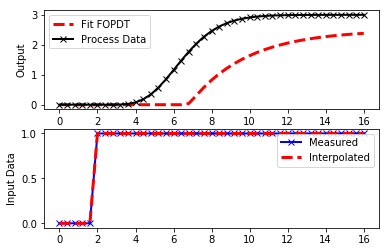

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.interpolate import interp1d

%matplotlib inline
# define process model (to generate process data)
def process(y,t,n,u,Kp,taup):
    # arguments
    #  y[n] = outputs
    #  t    = time
    #  n    = order of the system   
    #  u    = input value
    #  Kp   = process gain
    #  taup = process time constant

    # equations for higher order system
    dydt = np.zeros(n)
    # calculate derivative
    dydt[0] = (-y[0] + Kp * u)/(taup/n)
    for i in range(1,n):
       dydt[i] = (-y[i] + y[i-1])/(taup/n)
    return dydt

# define first-order plus dead-time approximation    
def fopdt(y,t,uf,Km,taum,thetam):
    # arguments
    #  y      = output
    #  t      = time
    #  uf     = input linear function (for time shift)
    #  Km     = model gain
    #  taum   = model time constant
    #  thetam = model time constant
    # time-shift u
    try:
        if (t-thetam) <= 0:
            um = uf(0.0)
        else:
            um = uf(t-thetam)
    except:
        #print('Error with time extrapolation: ' + str(t))
        um = 0
    # calculate derivative
    dydt = (-y + Km * um)/taum
    return dydt

# specify number of steps
ns = 40
# define time points
t = np.linspace(0,16,ns+1)
delta_t = t[1]-t[0]
# define input vector
u = np.zeros(ns+1)
u[5:] = 1.0
# create linear interpolation of the u data versus time
uf = interp1d(t,u)

# use this function or replace yp with real process data
def sim_process_data():
    # higher order process
    n=10       # order
    Kp=3.0    # gain
    taup=5.0   # time constant
    # storage for predictions or data
    yp = np.zeros(ns+1)  # process
    for i in range(1,ns+1):
        if i==1:
            yp0 = np.zeros(n)
        ts = [delta_t*(i-1),delta_t*i]
        y = odeint(process,yp0,ts,args=(n,u[i],Kp,taup))
        yp0 = y[-1]
        yp[i] = y[1][n-1]
    return yp
yp = sim_process_data()

# simulate FOPDT model with x=[Km,taum,thetam]
def sim_model(Km,taum,thetam):
    # input arguments
    #Km 
    #taum 
    #thetam 
    # storage for model values
    ym = np.zeros(ns+1)  # model
    # initial condition
    ym[0] = 0
    # loop through time steps    
    for i in range(1,ns+1):
        ts = [delta_t*(i-1),delta_t*i]
        y1 = odeint(fopdt,ym[i-1],ts,args=(uf,Km,taum,thetam))
        ym[i] = y1[-1]
    return ym    

# calculate model with updated parameters
Km = 2.5
taum = 3.0
thetam = 5.0
ym = sim_model(Km,taum,thetam)

# plot results
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,ym,'r--',linewidth=3,label='Fit FOPDT')
plt.plot(t,yp,'kx-',linewidth=2,label='Process Data')
plt.ylabel('Output')
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(t,u,'bx-',linewidth=2)
plt.plot(t,uf(t),'r--',linewidth=3)
plt.legend(['Measured','Interpolated'],loc='best')
plt.ylabel('Input Data')
plt.show()